In [48]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
import pylab as plot
import matplotlib.pyplot as plt
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)

In [2]:
print('Pandas : %s'%(pd.__version__))
print('Numpy : %s'%(np.__version__))
print('Scikit-Learn : %s'%(sklearn.__version__))
!python --version

Pandas : 1.1.3
Numpy : 1.19.2
Scikit-Learn : 0.23.2
Python 3.8.5


In [3]:
def grap_year(data):
    data = str(data)
    return int(data[:4])

def grap_month(data):
    data = str(data)
    return int(data[4:])

In [4]:
df = pd.read_csv('project2/Seoul.csv')
df['년'] = df['연월'].apply(lambda x: grap_year(x))
df['월'] = df['연월'].apply(lambda x: grap_month(x))
df = df.drop(['연월'], axis=1)

In [5]:
del df['고객_시군구']

In [6]:
columns = ['매장_시도', '매장_시군구', '고객_시도', '연령대', '성별', '가구생애주기', '년', '월']
df = df.groupby(columns).sum().reset_index(drop=False)

In [7]:
dtypes = df.dtypes
encoders = {}
for column in df.columns:
    if str(dtypes[column]) == 'object':
        encoder = LabelEncoder()
        encoder.fit(df[column])
        encoders[column] = encoder
        
df_num = df.copy()        
for column in encoders.keys():
    encoder = encoders[column]
    df_num[column] = encoder.transform(df[column])

In [8]:
df_1 = pd.read_csv('project2/Seoul_Test.csv')
df_1['년'] = df_1['연월'].apply(lambda x: grap_year(x))
df_1['월'] = df_1['연월'].apply(lambda x: grap_month(x))
df_1 = df_1.drop(['연월'], axis=1)

In [9]:
del df_1['고객_시군구']

In [10]:
columns = ['매장_시도', '매장_시군구', '고객_시도', '연령대', '성별', '가구생애주기', '년', '월']
df_1 = df_1.groupby(columns).sum().reset_index(drop=False)

In [11]:
dtypes = df_1.dtypes
encoders_1 = {}
for column in df_1.columns:
    if str(dtypes[column]) == 'object':
        encoder_1 = LabelEncoder()
        encoder_1.fit(df_1[column])
        encoders_1[column] = encoder_1
        
df_1_num = df_1.copy()        
for column in encoders_1.keys():
    encoder_1 = encoders_1[column]
    df_1_num[column] = encoder_1.transform(df_1[column])

In [12]:
df_num

,매장_시도,매장_시군구,고객_시도,연령대,성별,가구생애주기,년,월,이용고객수,이용금액,이용건수
0,0,0,0,0,1,1,2019,5,3,59600,3
1,0,0,0,0,1,1,2019,7,3,18700,7
2,0,0,0,0,1,1,2019,8,3,61400,13
3,0,0,0,0,1,1,2020,2,3,89000,5
4,0,0,0,0,2,1,2019,2,3,17170,3
...,...,...,...,...,...,...,...,...,...,...,...
117479,0,24,16,6,2,5,2019,7,23,414000,26
117480,0,24,16,6,2,5,2019,8,12,245000,15
117481,0,24,16,6,2,5,2019,9,14,314000,17
117482,0,24,16,6,2,5,2019,10,4,119000,4


In [13]:
df_1_num

,매장_시도,매장_시군구,고객_시도,연령대,성별,가구생애주기,년,월,이용고객수,이용금액,이용건수
0,0,0,0,1,1,1,2020,4,1151,30259550,2471
1,0,0,0,1,1,2,2020,4,88,2067160,163
2,0,0,0,1,2,1,2020,4,1436,31853423,2504
3,0,0,0,1,2,2,2020,4,217,5533910,448
4,0,0,0,2,1,1,2020,4,74,2149090,170
...,...,...,...,...,...,...,...,...,...,...,...
7257,0,24,16,2,1,2,2020,4,29,1229890,47
7258,0,24,16,3,2,3,2020,4,3,58700,3
7259,0,24,16,4,1,4,2020,4,6,74700,9
7260,0,24,16,4,2,4,2020,4,10,208300,14


# 트레인셋 테스트셋 만들기

In [14]:
y_train=df_num.loc[:,'이용금액']
X_train=df_num.loc[:,df_num.columns !='이용금액']

y_test=df_1_num.loc[:,'이용금액']
X_test=df_1_num.loc[:,df_1_num.columns !='이용금액']

0       30259550
1        2067160
2       31853423
3        5533910
4        2149090
          ...   
7257     1229890
7258       58700
7259       74700
7260      208300
7261      186660
Name: 이용금액, Length: 7262, dtype: int64

In [15]:
mseOos = []
nTreeList = range(50, 500, 10)
for iTrees in nTreeList:
    depth = None
    maxFeat = 3 #조정해볼 것
    wineRFModel = ensemble.RandomForestRegressor(n_estimators=iTrees,
                    max_depth=depth, 
                    max_features=maxFeat,
                    oob_score=False, 
                    random_state=531)
    wineRFModel.fit(X_train, y_train)
    #데이터 세트에 대한 MSE 누적
    prediction = wineRFModel.predict(X_test)
    mseOos.append(mean_squared_error(y_test, prediction))
    
print("MSE")
print(mseOos[-1])

MSE
865223162092953.1


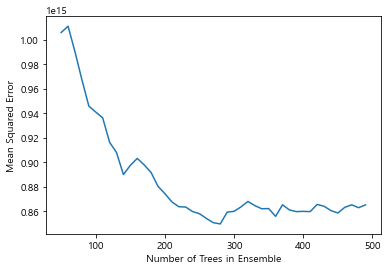

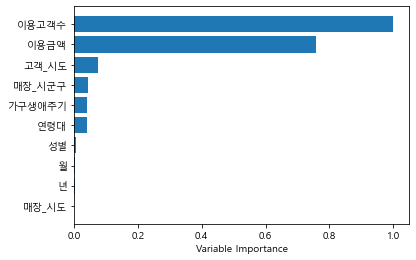

In [53]:

#트레이닝 테스트 오차 대비  앙상블의 트리 개수 도표 그리기
plot.plot(nTreeList, mseOos)
plot.xlabel('Number of Trees in Ensemble')
plot.ylabel('Mean Squared Error')
#plot.ylim([0.0, 1.1*max(mseOob)])
plot.show()
 
#피처 중요도 도표 그리기
featureImportance = wineRFModel.feature_importances_
 
#가장 높은 중요도 기준으로 스케일링
featureImportance = featureImportance/featureImportance.max()
sorted_idx = np.argsort(featureImportance)
barPos = np.arange(sorted_idx.shape[0])+.5
plot.barh(barPos, featureImportance[sorted_idx], align='center')
plot.yticks(barPos, df_num.columns[sorted_idx])
plot.xlabel('Variable Importance')
plot.show()
 
#printed Output